#### K-Means Clustering

1.  This algorithm takes into consideration the centroid value of a given dataset points. based on those centroids clusters are formed.
2.  Once the clusters are formed , it is then checked with euclidean distance that how far are other data points from all the clusters
3.  Suppose there are two clusters c1 and c2 , our new datapoint's distance with c1 is 4.5 and with c2 is 14.6.
4.  As the distance is less with c1 , hence we can safely add our new datapoint to the c1 cluster.
5.  We have to remember that whenever we are adding a new data point to a cluster , that cluster's centroid needs to be recalculated again.
6.  Then with the new centroid value of the cluster where data is added , we will go on and check next inline data points and their euclidean distance.

In [34]:
# Let's create a dataframe using pandas first for our calculation
import pandas as pd
df = pd.DataFrame(data=[[12,95],
                  [10,86],
                  [9,75],
                  [11,98],
                  [5,45],
                  [6,59],
                  [4,28]],columns=['Hours Studied','Marks Obtained'])

In [35]:
df.head()

,Hours Studied,Marks Obtained
0,12,95
1,10,86
2,9,75
3,11,98
4,5,45


Now just for understanding , let's take index 0 and 1 as our two clusters as C1 and C2. Then we will calculate all the other indexed data point's euclidean distance with these clusters.

In [36]:
c1 = df.iloc[0]
c2 = df.iloc[1]

In [37]:
c1.head()

Hours Studied     12
Marks Obtained    95
Name: 0, dtype: int64

In [38]:
c2.head()

Hours Studied     10
Marks Obtained    86
Name: 1, dtype: int64

Now let's go ahead and calculate the euclidean distance of each data point with our clusters , we will check out both the numpy library procedure and the scikit learn library method over here.

In [39]:
#importing numpy and converting our clusters into numpy arrays
import numpy as np
c1 = np.array([c1])
c2 = np.array([c2])


In [40]:
c1

array([[12, 95]], dtype=int64)

In [41]:
c2

array([[10, 86]], dtype=int64)

Now from our main dataframe let's take the 2nd indexed data and convert it into a numpy array. Then we will check this datapoint's euclidean distance with both c1 and c2

In [42]:
d1 = np.array([df.iloc[2]])

Now we will check the distance of the d1 with both c1 and c2

In [43]:
# first let's find out the sum of squares
sum_sq_c1 = np.sum(np.square(d1-c1))
sum_sq_c2 = np.sum(np.square(d1-c2))
# Then let's square root the result and find out the euclidean distance
ed_c1d1 = np.sqrt(sum_sq_c1)
ed_c2d1 = np.sqrt(sum_sq_c2)

In [44]:
# Let's print our results
print(f"the euclidean distance between c1 cluster and d1 datapoint is {ed_c1d1}")
print(f"the euclidean distance between c2 cluster and d1 datapoint is {ed_c2d1}")

the euclidean distance between c1 cluster and d1 datapoint is 20.223748416156685
the euclidean distance between c2 cluster and d1 datapoint is 11.045361017187261


We can see from thee above example that d1 datapoint's euclidean distance is lesser with c2 cluster , hence it can be safely said that d1 datapoint will belong in the c2 cluster. And as the c2 cluster is getting an added data point , hence it's centroid needs to be calculated again. But first let's check the euclidean distance with sklearn library method as well.

In [45]:
# importing the module
from sklearn.metrics.pairwise import euclidean_distances
ed_c1d1_sklearn = euclidean_distances(d1,c1)
ed_c2d1_sklearn = euclidean_distances(d1,c2)
#printing the result
print(f"the euclidean distance between c1 cluster and d1 datapoint with sklearn method is {ed_c1d1_sklearn}")
print(f"the euclidean distance between c2 cluster and d1 datapoint with sklearn method is {ed_c2d1_sklearn}")

the euclidean distance between c1 cluster and d1 datapoint with sklearn method is [[20.22374842]]
the euclidean distance between c2 cluster and d1 datapoint with sklearn method is [[11.04536102]]


Now that our theory has been proven with both numpy and sklearn method , we can safely say that the datapointd1 belongs with c2 cluster. Let's cacluate the new centroid now for c2 cluster. It is simply addition of new added value to the existing centroid value and division by 2 and we have 2 elements in the cluster now.

First let's take things manually , in c2 array we have [10,86] and in d1 array we have [9,75] so ideally our new centroid for c2 should be ([10+9]/2,[86+75]/2) or (9.5,80.5). Lets find out

In [46]:
c2 = (c2+d1)/2
print(f"The new centroid values for c2 cluster is {c2}")

The new centroid values for c2 cluster is [[ 9.5 80.5]]


#### ML Implementation
Now that we have a fair idea that how K means clustering work , let's go ahead and implement the same with sklearn library and visualize

In [47]:
#importing neccesary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

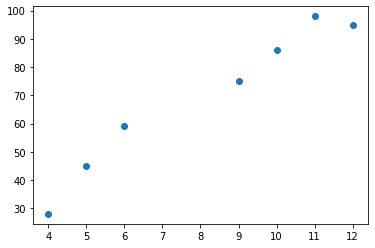

In [48]:
#display the data
plt.scatter(df['Hours Studied'],df['Marks Obtained'])

In [60]:
# Scaling of our data
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

With the above visualization we can identify two clusters primarily

In [61]:
# let's implement our algorithm now
km = KMeans(n_clusters=2,n_init='auto')
km

KMeans(n_clusters=2, n_init='auto')

In [64]:
# Now that our model is created with 2 clusters , we can directly fit and predict all the data points available in the dataframe at once
ypred = km.fit_predict(df)
ypred

array([0, 0, 0, 0, 1, 1, 1])

In [70]:
# Now let's convert our scaled data into pandas dataframe again
df = pd.DataFrame(df)

In [71]:
df.head(10)

,0,1,2
0,1.000,0.957143,1.0
1,0.750,0.828571,1.0
2,0.625,0.671429,1.0
3,0.875,1.000000,1.0
4,0.125,0.242857,0.0
5,0.250,0.442857,0.0
6,0.000,0.000000,0.0


On the above example we can see cluster 0 and 1 is assigned to each of the data point present.

#### Informations on K Means clustering
1.  Train test split is not required (it's not required in any unsupervised learning)
2.  Data should not contain outliers.
3.  Less number of features/Variable
4.  None or rare co linearity between variables
5.  Variables should be on the same scale
